# <span class="bg-primary">21. ANALYSER DONNEES VISUELLES</span>

# <span class="bg-info">TRAITEMENT IMAGE PILLOW</span>

In [4]:
from PIL import Image

# <span class="bg-warning">Chargement de l'image</span>

In [ ]:
# Charger l'image
img = Image.open("simba.png") 

# Afficher l'image chargée
img.show()

# <span class="bg-warning">TAILLE DE L'IMAGE</span>

In [5]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 249 px, hauteur : 252 px


# <span class="bg-warning">PIXEL</span>

In [6]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (174, 174, 174)


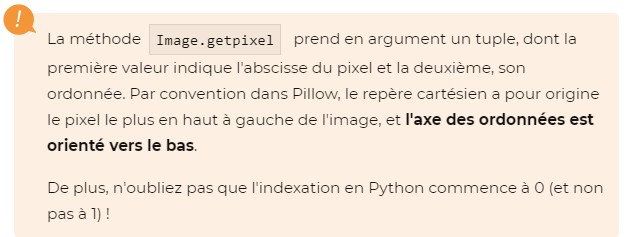

# <span class="bg-warning">MATRICE DE L'IMAGE</span>

In [8]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
print(mat)

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

[[[255 255 255]
  [213 213 213]
  [211 211 211]
  ...
  [200 200 200]
  [202 202 202]
  [202 202 202]]

 [[255 255 255]
  [211 211 211]
  [210 210 210]
  ...
  [199 199 199]
  [200 200 200]
  [202 202 202]]

 [[255 255 255]
  [210 210 210]
  [209 209 209]
  ...
  [198 198 198]
  [199 199 199]
  [200 200 200]]

 ...

 [[255 255 255]
  [140 140 140]
  [142 142 142]
  ...
  [151 151 151]
  [152 152 152]
  [160 160 160]]

 [[255 255 255]
  [156 156 156]
  [143 143 143]
  ...
  [140 140 140]
  [134 134 134]
  [137 137 137]]

 [[255 255 255]
  [154 154 154]
  [150 150 150]
  ...
  [126 126 126]
  [133 133 133]
  [134 134 134]]]
Taille de la matrice de pixels : (252, 249, 3)


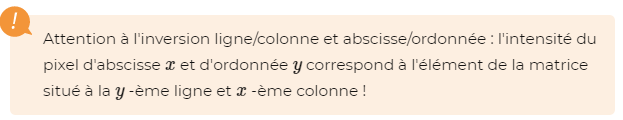

# <span class="bg-warning">HISTOGRAMME - REPARTITION DES PIXELS SELON INTENSITE</span>

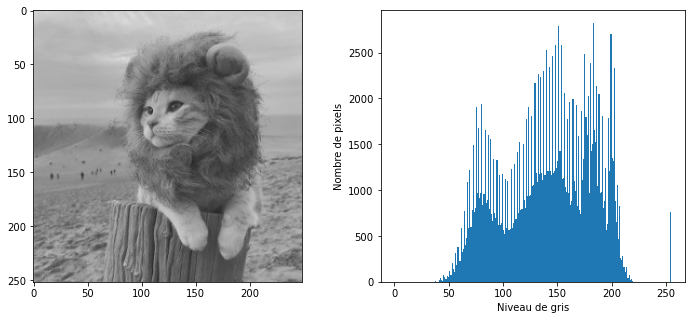

In [20]:
# L'histogramme d'une image numérique est une courbe statistique représentant 
# la répartition de ses pixels selon leur intensité. 
# Pour une image en noir et blanc, il indique en abscisse le niveau de gris 
# (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette 
# valeur.
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from scipy import misc

fig = plt.figure(figsize=(12,5))

# Image de départ 
ax = fig.add_subplot(121)
img = Image.open("simba.png") 
ax = plt.imshow(img)

# Répartitions des pixels selon l'intensité
ax = fig.add_subplot(122)
img_mat = np.array(Image.open('simba.png'))
n, bins, patches = plt.hist(img_mat.flatten(), bins=range(256))

plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.show()

# <span class="bg-info">EXPOSITION</span>

# SOUS EXPOSEE

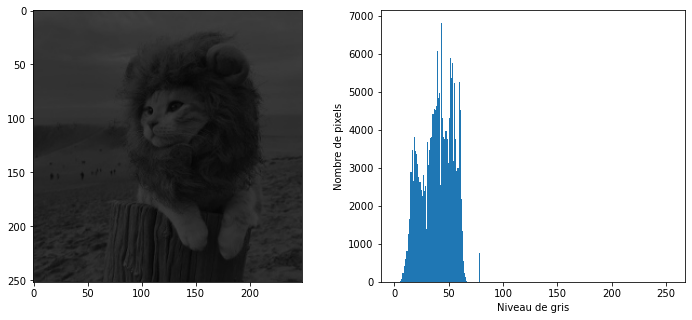

In [24]:
# pour l'image trop sombre, ou sous-exposée, la majorité des pixels se situent 
# dans la partie gauche de l'histogramme, vers les valeurs de niveaux de gris 
# faibles.
from scipy import misc

fig = plt.figure(figsize=(12,5))

# Image de départ 
ax = fig.add_subplot(121)
img_sous_exposee = Image.open("simba-sous_exposee.png") 
ax = plt.imshow(img_sous_exposee)

# Répartitions des pixels selon l'intensité
ax = fig.add_subplot(122)
img_mat = np.array(Image.open('simba-sous_exposee.png'))
n, bins, patches = plt.hist(img_mat.flatten(), bins=range(256))

plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.show()


# SUR EXPOSEE

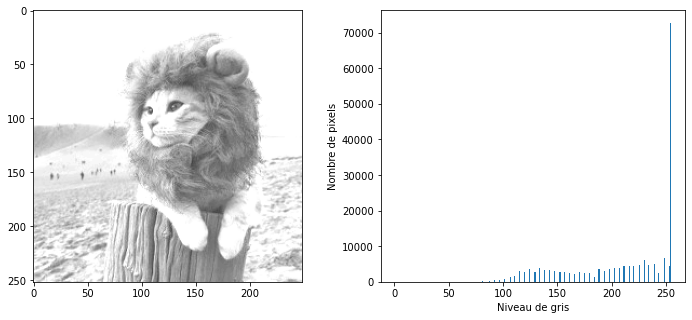

In [25]:
# pour l'image trop sombre, ou sous-exposée, la majorité des pixels se situent 
# dans la partie gauche de l'histogramme, vers les valeurs de niveaux de gris 
# faibles.
from scipy import misc

fig = plt.figure(figsize=(12,5))

# Image de départ 
ax = fig.add_subplot(121)
img_sur_exposee = Image.open("simba-sur_exposee.png") 
ax = plt.imshow(img_sur_exposee)

# Répartitions des pixels selon l'intensité
ax = fig.add_subplot(122)
img_mat = np.array(Image.open('simba-sur_exposee.png'))
n, bins, patches = plt.hist(img_mat.flatten(), bins=range(256))

plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.show()

# <span class="bg-warning">CORRECTION SUR EXPOSITION</span>

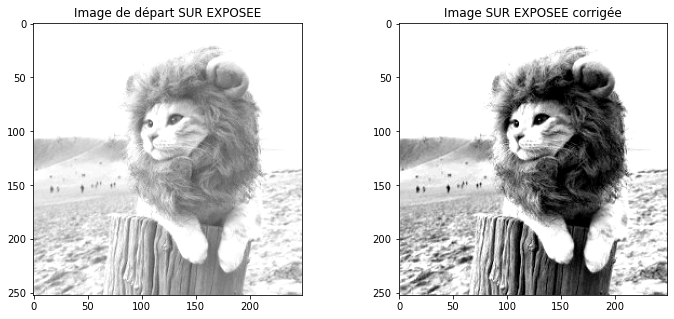

In [33]:
from PIL import ImageOps  

img_sur_expo_corrigee = ImageOps.autocontrast(img_sur_exposee, cutoff = 2, ignore = 2) 
  
fig = plt.figure(figsize=(12,5))

# Image de départ sur exposée
ax = fig.add_subplot(121)
img_sur_exposee = Image.open("simba-sur_exposee.png") 
ax = plt.imshow(img_sur_exposee)
plt.title('Image de départ SUR EXPOSEE')

# Image de départ sur exposée corrigée
ax = fig.add_subplot(122)
ax = plt.imshow(img_sur_expo_corrigee)
plt.title('Image SUR EXPOSEE corrigée')

plt.show()

# <span class="bg-warning">EGALISATION D'HISTOGRAMME</span>

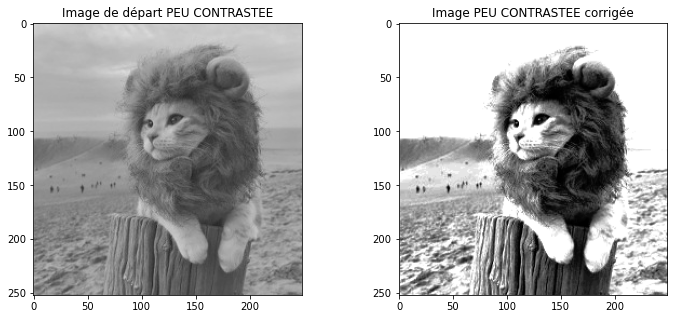

In [35]:
from PIL import ImageOps  

img_peu_contrastee_corrigee = ImageOps.equalize(img, mask = None) 
  
fig = plt.figure(figsize=(12,5))

# Image de départ peu contrastée
ax = fig.add_subplot(121)
img_peu_contrastee = Image.open("simba.png") 
ax = plt.imshow(img_peu_contrastee)
plt.title('Image de départ PEU CONTRASTEE')

# 
ax = fig.add_subplot(122)
ax = plt.imshow(img_peu_contrastee_corrigee)
plt.title('Image PEU CONTRASTEE corrigée')

plt.show()

# <span class="bg-info">TRANSFORMATIONS GEOMETRIQUES</span>

# ROTATION

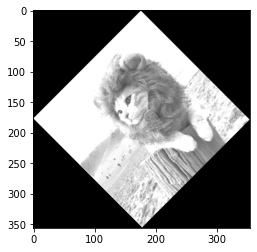

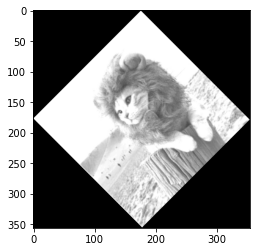

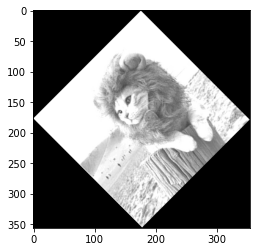

In [47]:
import PIL

plt.imshow(img.rotate(45, resample=PIL.Image.NEAREST, expand=True))
plt.show()
plt.imshow(img.rotate(45, resample=PIL.Image.BILINEAR, expand=True))
plt.show()
plt.imshow(img.rotate(45, resample=PIL.Image.BICUBIC, expand=True))
plt.show()

# <span class="bg-info">BRUIT DE L'IMAGE</span>

# AJOUT DU BRUIT

(252, 249, 3)
(252, 249, 3)


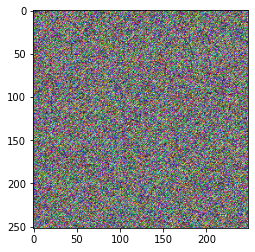

In [72]:
import random

# Charger l'image sous forme d'une matrice de pixels
img = np.array(Image.open('simba.png'))
print(img.shape)
# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, img.shape)
print(noise.shape)

# Créer l'image bruitée et l'afficher
# noisy_img = Image.fromarray(img + noise).convert('RGB')
noisy_img = Image.fromarray(img + noise, mode = 'RGB').convert('RGB')
plt.imshow(noisy_img, )
plt.show()

# LISSAGE DU BRUIT

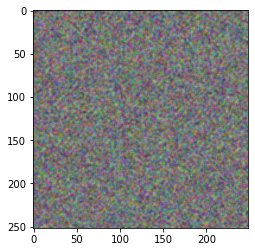

In [75]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher 
# le résultat
noisy_img_lisse = noisy_img.filter(ImageFilter.BoxBlur(1))
plt.imshow(noisy_img_lisse)
plt.show()

# <span class="bg-warning">TP : Implémentez votre premier réseau de neurones avec Keras</span>

In [ ]:
# VGG-16, une version du réseau de neurones convolutif très connu appelé
# VGG-Net
# VGG-16 est constitué de plusieurs couches, dont 13 couches de convolution et 
# 3 fully-connected. Il doit donc apprendre les poids de 16 couches.
# l prend en entrée une image en couleurs de taille 224  × 224 px et la 
# classifie dans une des 1000 classes. Il renvoie donc un vecteur de taille
# 1000, qui contient les probabilités d'appartenance à chacune des classes.

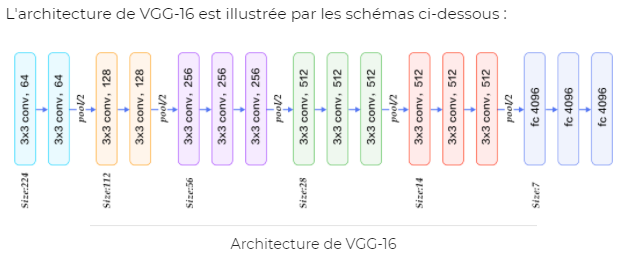

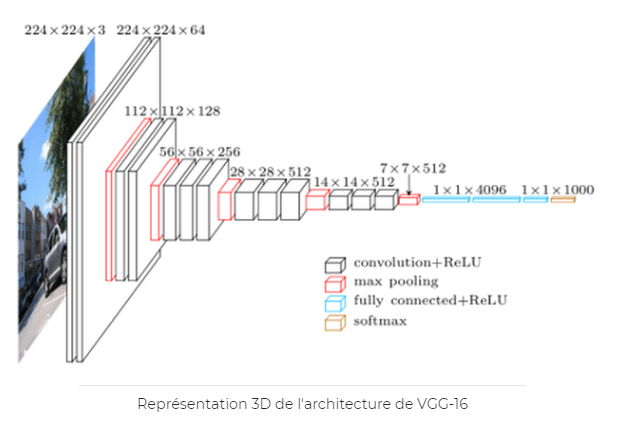

In [78]:
# Création du modèle du réseau de neurones
from keras.models import Sequential

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

# Ajout de la première couche de convolution, suivie d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same',
                    activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
# ../..

In [ ]:
# Ainsi, les trois dernières couches fully-connected et leur fonction
# d'activation (ReLU pour les deux premières, softmax pour la dernière) sont 
# ajoutées de la manière suivante :

from keras.layers import Flatten, Dense

my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))

In [ ]:
# Utilisation du VGG-16 pré-entraîné
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img('cat.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [ ]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [77]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Transfer Learning
from keras.applications.vgg16 import VGG16
from keras.layers import Dense

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(10, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# Stratégie #1 : fine-tuning total
for layer in model.layers:
   layer.trainable = True

In [ ]:
# Stratégie #2 : extraction de features
for layer in model.layers:
   layer.trainable = False

In [ ]:
# Stratégie #3 : fine-tuning partiel
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model.layers[:5]:
   layer.trainable = False

In [ ]:
# Entraînement du réseau
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)